In [2]:
import pandas as pd
%matplotlib inline
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

df = pd.read_csv('../data/cases_train.csv')
location_df = pd.read_csv('../data/location.csv')

pd.set_option("display.max.columns", None)

In [3]:
# missing counts
for col in df.columns:
    null_count = df[col].isnull().sum()
    print(f'total missing value in {col} column is {null_count}')

total missing value in age column is 209265
total missing value in sex column is 207084
total missing value in province column is 4106
total missing value in country column is 18
total missing value in latitude column is 2
total missing value in longitude column is 2
total missing value in date_confirmation column is 288
total missing value in additional_information column is 344912
total missing value in source column is 128478
total missing value in outcome column is 0


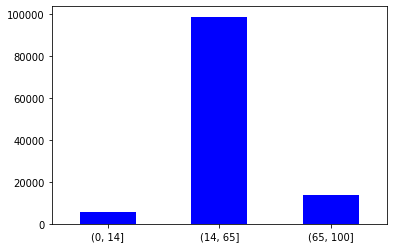

In [17]:
# Age distribution
filtered_age_df = pd.to_numeric(df['age'], errors='coerce').dropna()
out = pd.cut(filtered_age_df, bins=[0, 14, 65, 100])
ax = out.value_counts(sort=False).plot.bar(rot=0, color="b", figsize=(6,4))

                  male  female
nonhospitalized  72675   62695
hospitalized     12581    6564
recovered         2662    2255
deceased           717     403


<AxesSubplot:title={'center':'Outcome distribution by sex'}>

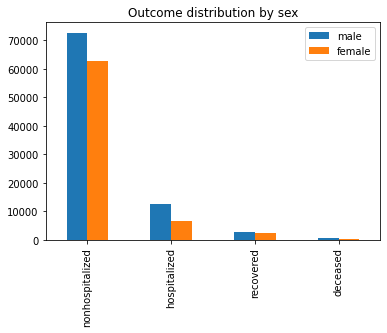

In [3]:
male_outcome = df[df['sex'] == 'male']['outcome'].value_counts().rename('male')
female_outcome = df[df['sex'] == 'female']['outcome'].value_counts().rename('female')

plotdata = pd.concat([male_outcome, female_outcome], axis=1)
print(plotdata)
plotdata.plot(kind='bar', title='Outcome distribution by sex')

<AxesSubplot:title={'center':'Cases by Country'}>

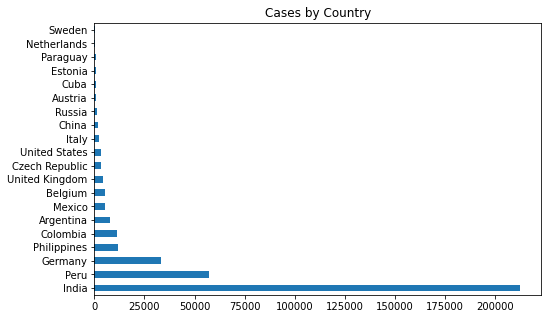

In [4]:
#country
df['country'].value_counts()[:20].plot(kind='barh', figsize=(8, 5), title='Cases by Country')

<AxesSubplot:title={'center':'Cases by Province'}>

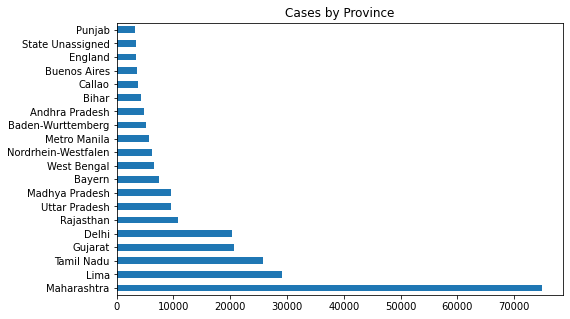

In [5]:
# province
df['province'].value_counts()[:20].plot(kind='barh', figsize=(8, 5), title='Cases by Province')

<AxesSubplot:>

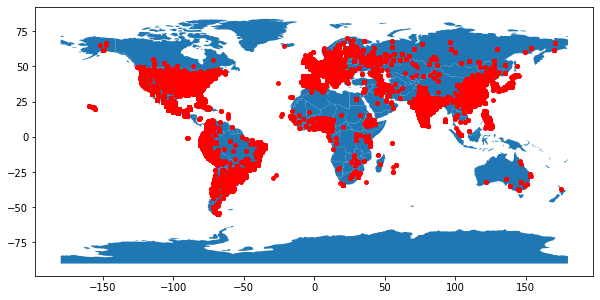

In [6]:
# longuitude, latitude,
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf = GeoDataFrame(df, geometry=geometry)   

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15)


<AxesSubplot:title={'center':'confirmed cases by date'}>

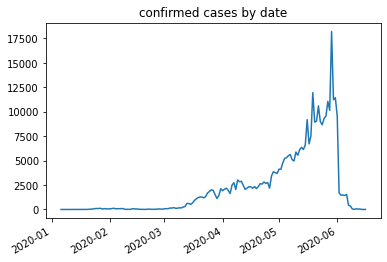

In [7]:
# datetime
df['date_confirmation'] = pd.to_datetime(df['date_confirmation'], format='%d.%m.%Y', errors='coerce')
df['date_confirmation'].value_counts().plot.line(title='confirmed cases by date')

<AxesSubplot:title={'center':'Outcome distribution'}>

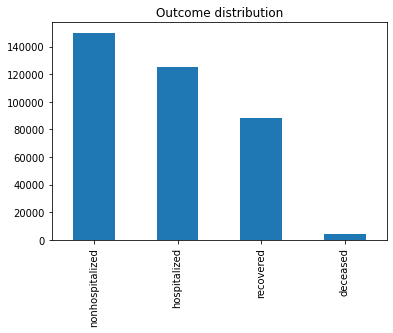

In [8]:
# outcome
df['outcome'].value_counts().plot.bar(title='Outcome distribution')

<AxesSubplot:title={'center':'Top30 Case-Fatality Ratio Countries'}, xlabel='Combined_Key'>

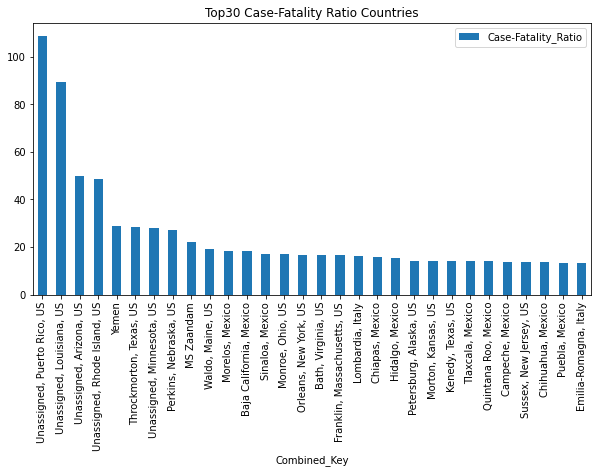

In [9]:
# location plots
# top case-fatality ratio
top30_deadly_region_df = location_df.sort_values('Case-Fatality_Ratio',ascending = False)[:30]
top30_deadly_region_df.plot.bar(x='Combined_Key', y='Case-Fatality_Ratio', figsize=(10, 5), title='Top30 Case-Fatality Ratio Countries')

<AxesSubplot:title={'center':'Top30 incidence rate countries'}, xlabel='Combined_Key'>

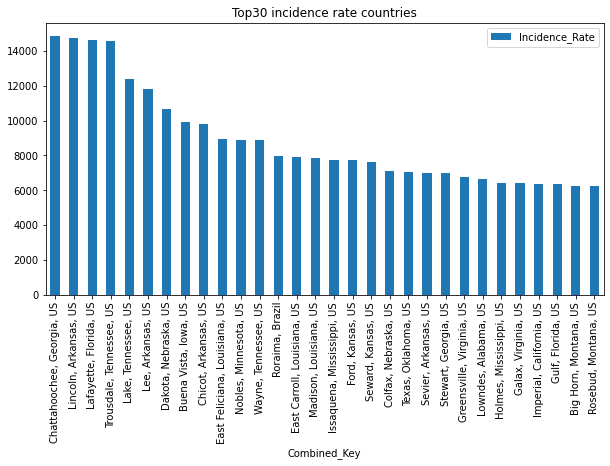

In [10]:
# top incidence rate region plot
top30_rate_region_df = location_df.sort_values('Incidence_Rate',ascending = False)[:30]
top30_rate_region_df.plot.bar(x='Combined_Key', y='Incidence_Rate', figsize=(10, 5), title='Top30 incidence rate countries')

<AxesSubplot:title={'center':'Top30 confirmed cases countries'}, xlabel='Country_Region'>

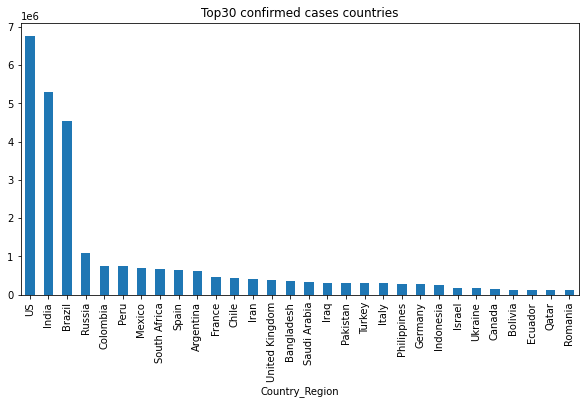

In [11]:
#most confirm cases country
top30_cases_country_df = location_df.groupby('Country_Region').Confirmed.sum().sort_values(ascending=False)
top30_cases_country_df[:30].plot.bar(title='Top30 confirmed cases countries' ,figsize=(10, 5))


<AxesSubplot:title={'center':'Top 30 death count countries'}, xlabel='Country_Region'>

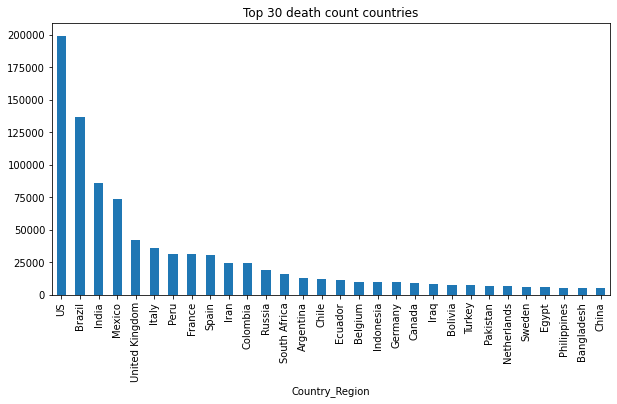

In [12]:
# most death country
top30_death_country_df = location_df.groupby('Country_Region').Deaths.sum().sort_values(ascending=False)
top30_death_country_df[:30].plot.bar(title='Top 30 death count countries', figsize=(10, 5))

<AxesSubplot:title={'center':'Top30 active cases countries'}, xlabel='Country_Region'>

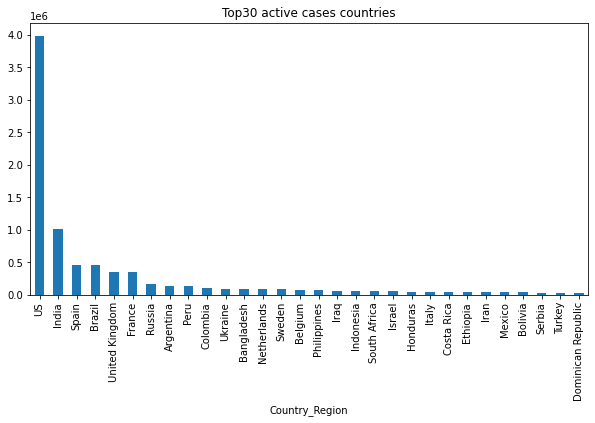

In [13]:
# most active cases country
top30_activecase_country_df = location_df.groupby('Country_Region').Active.sum().sort_values(ascending=False)
top30_activecase_country_df[:30].plot.bar(title='Top30 active cases countries' ,figsize=(10, 5))

<AxesSubplot:title={'center':'Top30 recovered cases countries'}, xlabel='Country_Region'>

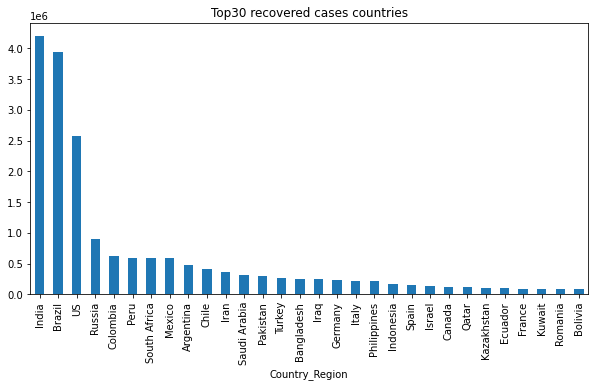

In [14]:
# most recovered cases country
top30_recovered_case_country_df = location_df.groupby('Country_Region').Recovered.sum().sort_values(ascending=False)
top30_recovered_case_country_df[:30].plot.bar(title='Top30 recovered cases countries' ,figsize=(10, 5))
